In [1]:
import numpy as np
import pandas as pd

In [2]:
# As per question 1
mu = 56
sigma = 78
N = 100

modevalue = 6.7

columns_dict = {
    'Normal': np.random.normal(loc=mu, scale=sigma, size=N),
    'Rayleigh': np.random.rayleigh(modevalue, N),
    'Standard Normal': np.random.normal(size=N)
}

df = pd.DataFrame(data=columns_dict)

In [3]:
df.head()

,Normal,Rayleigh,Standard Normal
0,83.202087,15.969839,-1.371212
1,179.965144,12.049153,-2.396392
2,112.913393,5.944173,1.813777
3,118.085617,15.125708,2.332799
4,4.548486,12.690381,-0.011192


In [4]:
# %load scripts/binary_search_tree.py

from collections import deque


class Node(object):
    def __init__(self, d):
        self.data = d
        self.left = None
        self.right = None

    def insert(self, d):
        # This is when we don't allow duplicates, here we are allowing
        # if we do not want to allow the duplicates
        # just uncomment first two line and instead of < lt use <= lteq afterwards.

        #if self.data == d:
        #    return False
        # This is done to make pretty print work,
        if d == None:
            return

        if d <= self.data:
            if self.left:
                self.left.insert(d)
            else:
                self.left = Node(d)
                return True
        else:
            if self.right:
                self.right.insert(d)
            else:
                self.right = Node(d)
                return True

    def preorder(self, l):
        l.append(self.data)
        if self.left:
            self.left.preorder(l)
        if self.right:
            self.right.preorder(l)
        return l

    def postorder(self, l):
        if self.left:
            self.left.postorder(l)
        if self.right:
            self.right.postorder(l)
        l.append(self.data)
        return l

    def inorder(self, l):
        if self.left:
            self.left.inorder(l)
        l.append(self.data)
        if self.right:
            self.right.inorder(l)
        return l

    def levelorder(self, l, queue=deque()):
        l.append(self.data)
        [queue.append(node) for node in [self.left, self.right] if node]
        if queue:
            queue.popleft().levelorder(l, queue)
        return l

    def levelorder2(self, l, head, queue=deque()):
        if head is None:
            return l
        l.append(head.data)
        [queue.append(node) for node in [head.left, head.right] if node]
        if queue:
            self.levelorder2(l, queue.popleft(), queue)
        return l


class BST(object):
    def __init__(self):
        self.root = None

    # For now it will return true for all the values since we are allowind duplicates
    def insert(self, d):

        # This is done to make pretty print work,
        if d == None:
            return

        if self.root:
            return self.root.insert(d)
        else:
            self.root = Node(d)
            return True

    def preorder(self):
        if self.root:
            return self.root.preorder([])
        else:
            return []

    def postorder(self):
        if self.root:
            return self.root.postorder([])
        else:
            return []

    def inorder(self):
        if self.root:
            return self.root.inorder([])
        else:
            return []

    def levelorder(self):
        if self.root:
            return self.root.levelorder([])
        else:
            return []

In [5]:
random_numbers = list(df[df.columns[2]])
bst = BST()

for num in random_numbers:
    bst.insert(num)

print(bst.inorder())

True

True

True

[-2.3963922906734942, -2.3567739335473203, -2.356594423287962, -1.7986757881887534, -1.7070451530407529, -1.5895457499773626, -1.5248471494320681, -1.465681883781933, -1.3712116492748956, -1.36656157340113, -1.2980310856751744, -1.2445930919375203, -1.241248666156177, -1.1666779278081962, -1.1375336333979433, -1.0451205467496323, -1.0178903424429993, -1.007990169426319, -0.9210806012428879, -0.9128293575967494, -0.8938760779432894, -0.7527213723972447, -0.7515029189202509, -0.6835575759216296, -0.6812679828834672, -0.6027661123775846, -0.4784292428158732, -0.45046163517300686, -0.4021317820454598, -0.3949211635816281, -0.38883058043287944, -0.3832896332865923, -0.3773621680050949, -0.3771713226333788, -0.35088273877770093, -0.3258753836777013, -0.3143609376507569, -0.28010703677453747, -0.24654279479752136, -0.18540305465091875, -0.14893154971050634, -0.08567992674495774, -0.06438877182056436, -0.02619762203680278, -0.01119188428564657, -0.008950450653512906, -0.004724358705586171, 0.0

In [6]:
# Question 3
dict = {
    'A': [1, 2, 4, 8, 4, 9, 6, 3, 2, 1],
    'B': [1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
    'C': [3, 2, 3, 3, 3, 7, 4, 3, 6, 1]
}

small_df = pd.DataFrame(data=dict)
small_df

,A,B,C
0,1,1,3
1,2,0,2
2,4,0,3
3,8,0,3
4,4,1,3
5,9,0,7
6,6,1,4
7,3,1,3
8,2,0,6
9,1,1,1


In [7]:
# 3.a E(A|C=3)

N =10
df_A_when_C_has_occurred = small_df.loc[small_df['C'] == 3]
size_of_A_after_C_occurred = len(df_A_when_C_has_occurred['A'].index)
print(df_A_when_C_has_occurred['A'])
print(np.sum(df_A_when_C_has_occurred['A']))
print(np.sum(df_A_when_C_has_occurred['A'])/size_of_A_after_C_occurred)

0    1
2    4
3    8
4    4
7    3
Name: A, dtype: int64
20
4.0


In [57]:
# 3.b P(A=2 and B=0|C=2) = P(A=2|C=2) * P(B=0|C=2)  

#N =100
df_C_has_occurred = small_df.loc[small_df['C'] == 2]
print(df_C_has_occurred)

# P(A=2|C=2)
N_C = len(df_C_has_occurred.index)
P_A = len(df_C_has_occurred.loc[df_C_has_occurred['A'] == 2].index)/N_C

# P(B=0|C=2)
P_B = len(df_C_has_occurred.loc[df_C_has_occurred['B'] == 0].index)/N_C

print("P(A=2 and B=0|C=2) = " + " P_A * P_B = " + str(P_A * P_B))
#print(size_of_A/N)

   A  B  C
1  2  0  2
P(A=2 and B=0|C=2) =  P_A * P_B = 1.0


### 3.c P(A|B) 

is a collection of probability distribution because we will take one value of B and calculate the value of A. Same go on and calculate all A w.r.t to all value of B.


### Q4

Point Estimators = A function that is used to find an approximate value of a population parameter from random samples of the population

Properties:-

1. Bias -  the closer the expected value of a parameter is to the value of the parameter being measured, the lesser the bias is.
2. Consistency - For the point estimator to be consistent, the expected value should move towards the true value of the parameter.
3. Most efficient or unbiased - The most efficient point estimator is the one with the smallest variance of all the unbiased and consistent estimators.

### Q5

Maximum likelihood estimation involves defining a likelihood function for calculating the conditional probability of observing the data sample given a probability distribution and distribution parameters. This approach can be used to search a space of possible distributions and parameters. 

### Q6 

Likelihood function - The likelihood function (often simply called the likelihood) measures the goodness of fit of a statistical model to a sample of data for given values of the unknown parameters.

The likelihood function describes a hypersurface whose peak, if it exists, represents the combination of model parameter values that maximize the probability of drawing the sample obtained.The procedure for obtaining these arguments of the maximum of the likelihood function is known as maximum likelihood estimation, which for computational convenience is usually done using the natural logarithm of the likelihood, known as the log-likelihood function. 

More from :- [https://en.wikipedia.org/wiki/Likelihood_function]

### Q7. What Is the Central Limit Theorem (CLT)?

First we need to know : A sampling distribution is a probability distribution of a statistic obtained through a large number of samples drawn from a specific population. 

In the study of probability theory, the central limit theorem (CLT) states that the distribution of sample means approximates a normal distribution (also known as a “bell curve”), as the sample size becomes larger, assuming that all samples are identical in size, and regardless of the population distribution shape.

According to the central limit theorem, the mean of a sample of data will be closer to the mean of the overall population in question, as the sample size increases, notwithstanding the actual distribution of the data. In other words, the data is accurate whether the distribution is normal or aberrant.

As a general rule, sample sizes equal to or greater than 30 are deemed sufficient for the CLT to hold

More from [https://www.investopedia.com/terms/c/central_limit_theorem.asp]





### Q8 Maximum Likelihood Estimation with Poisson



More from [https://cran.r-project.org/web/packages/opart/vignettes/opart_poisson.html]

A Poisson random variable $X$ with scale parameter $\mu$ has probability mass function 
$$
f(x) = \frac{\mu ^ {\kern 0.08 em x} e ^ {-\mu}} {x!} \qquad \qquad x = 0,1,2 , \ldots \,.
$$

Maximum likelihood estimation (MLE) is an estimation method that allows to use a sample to estimate the parameters of the probability distribution that generated the sample.



poisson_log_likelihood.png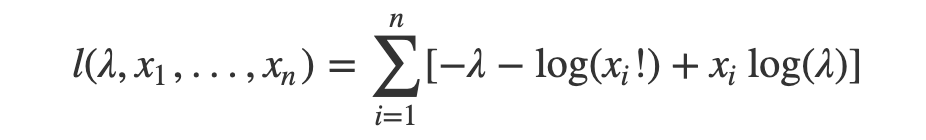

Poisson_Param.png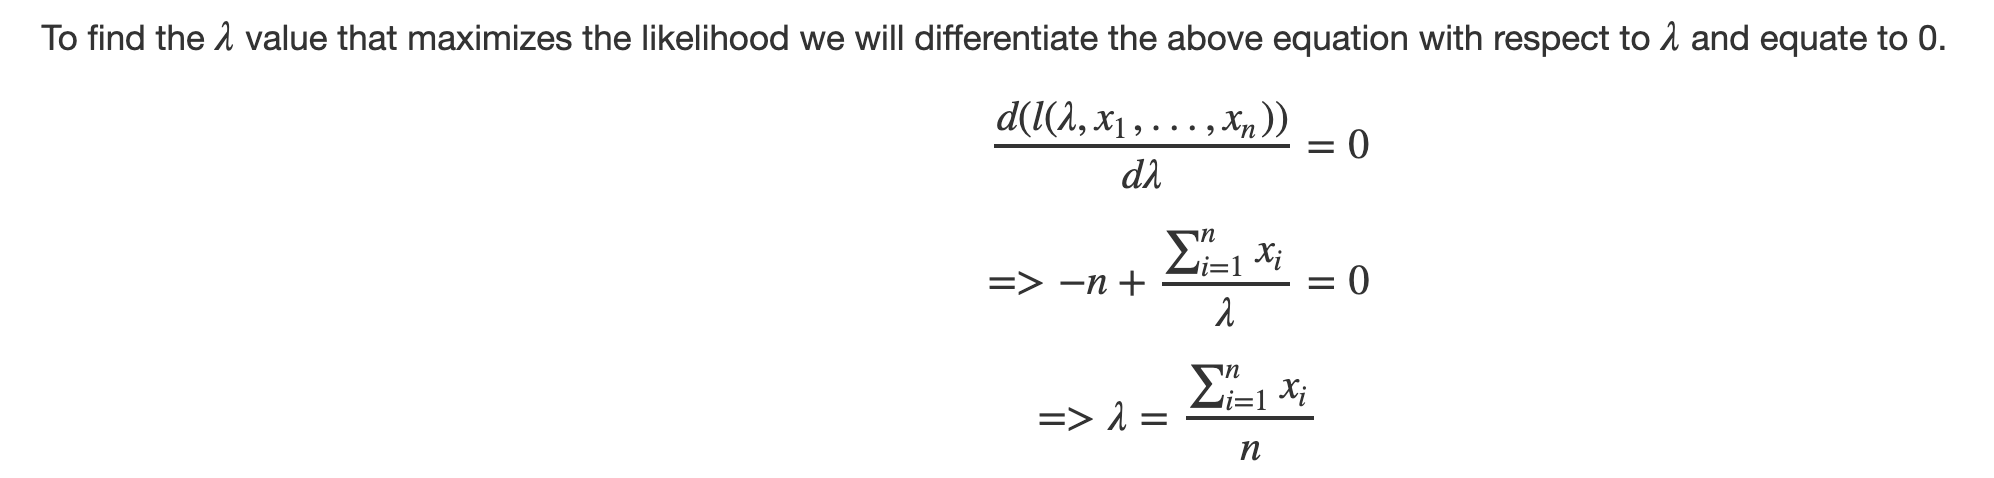

### Q9

In probability and statistics, 1.96 is the approximate value of the 97.5 percentile point of the normal distribution. 95% of the area under a normal curve lies within roughly 1.96 standard deviations of the mean, and due to the central limit theorem, this number is therefore used in the construction of approximate 95% confidence intervals. 

NormalDist1.96.png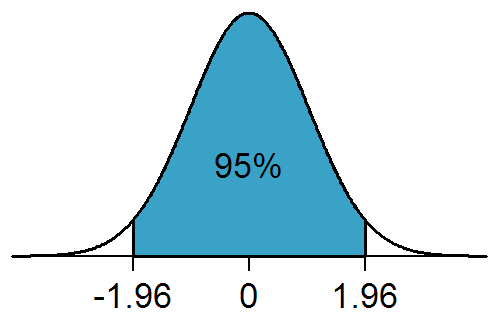

More from [https://en.wikipedia.org/wiki/1.96]

NormalDist_95.png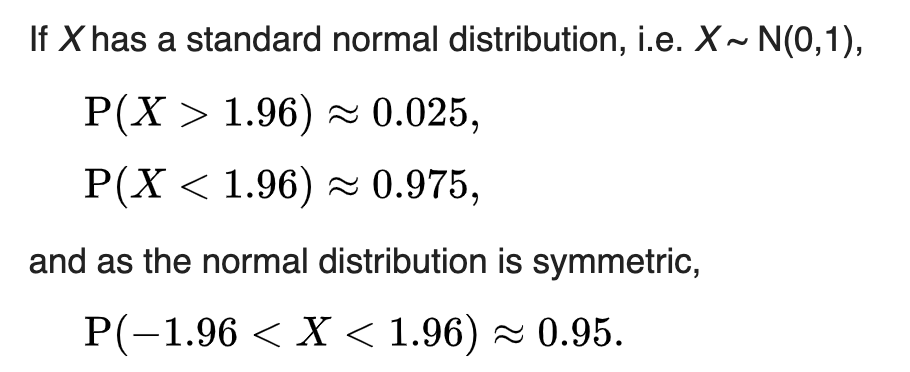

Same goes for the 2.745

Z_for_2.745 = .99695
Z_for_NEG_2.745 = .00305

P(Z=2.745) aprox is 99%


### Q10

From above its clear that we required mu +- 1.96 * Sigma to cover 95% area under curve
Same goes for 99% we need 2.575 times sigma which is standard deviation